In [60]:
from time import perf_counter_ns
from datetime import datetime
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [61]:
parquet_file_path = "/Users/zzyun/Documents/GitHub/csc369/week3/2022pyarrow.parquet"
polars_df = pl.scan_parquet(parquet_file_path)
polars_df_with_days = polars_df.group_by(
    ["x", "y"]).agg(pl.col("timestamp").count().alias("number_of_pixels")
).sort(pl.col("number_of_pixels"), descending=True)

polars_df_with_days = polars_df_with_days.collect()
polars_df_with_days.head(3)


x,y,number_of_pixels
i64,i64,u32
0,0,98807
359,564,69198
349,564,55230


The three most placed pixel locations are at (0, 0), (359, 564), and (349, 564). The placement of (0, 0) being the most placed location makes sense because it is the top left corner of the grid, so it is the most convenient location for colors to be placed. The other two pixels, (359, 564) and (349, 564) correspond to the two eyes of the skull in the Jolly Roger emblem of the straw hat pirate. Users continued to place pixels on the two eyes to make the skull embody a character named Sans, who is one of the main characters of the game Undertale. They placed blue pixels on his left eye and yellow pixels on his right eye, which correspond to the colors of patience and justice. 

In [90]:
top_three = (
    polars_df.filter(
        ((pl.col("x") == 359) & (pl.col("y") == 564)) |
        ((pl.col("x") == 349) & (pl.col("y") == 564)) |
        ((pl.col("x") == 0) & (pl.col("y") == 0))
    )
    .group_by(["x", "pixel_color"])
    .agg(pl.count().alias("count"))
    .sort(["x", "count"], descending=True)
    .group_by("x")
    .head(3)
    .collect()
)

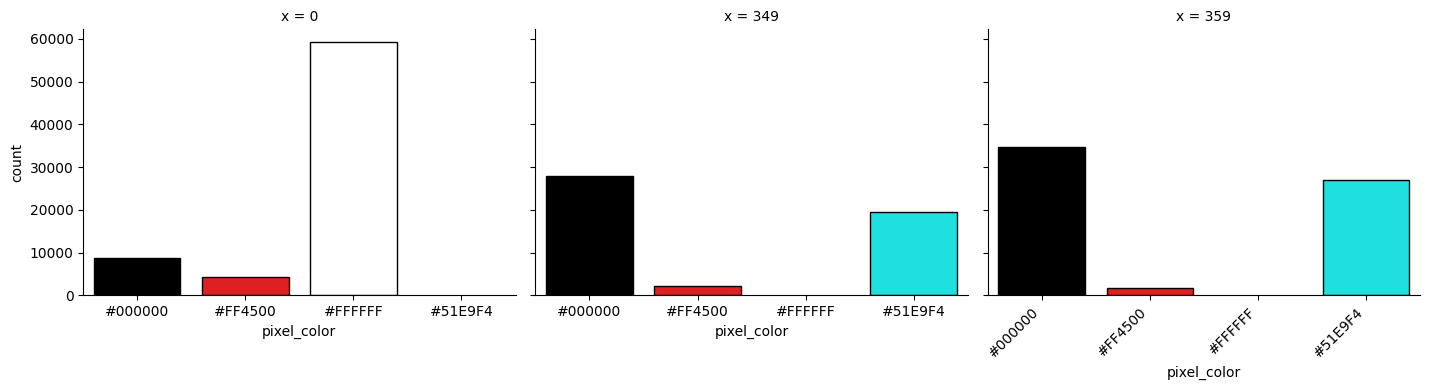

In [89]:
colors = {
    "#000000": "black", 
    "#FFFFFF": "white", 
    "#FF4500": "red", 
    "#51E9F4": "aqua"
}

graph = sns.FacetGrid(top_three, col="x", height=4, aspect=1.2, hue="pixel_color", legend_out=True)

graph.map_dataframe(sns.barplot, x="pixel_color", y="count", palette=colors, edgecolor="black")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As depicted above, the colors of the pixel placements for the top left coordinates are predominantly white, followed by some black and red pixels. For both of the skull's eyes, the top colors placed were black at first place, followed by blue and red. Knowing that Sans' left eye flashes blue when he uses telekenesis and the skull is intended to replicate Sans, it makes sense that blue pixels are the next most frequent colors that appear. The red pixels placed were meant to depict his red pupils. 

In [67]:
top_pixels_df = (
    polars_df.with_columns(
        pl.col("timestamp").dt.date().alias("Date")
    )
    .filter(
        ((pl.col("x") == 359) & (pl.col("y") == 564)) |
        ((pl.col("x") == 349) & (pl.col("y") == 564)) |
        ((pl.col("x") == 0) & (pl.col("y") == 0))
    )
    .group_by(["x", "Date"])
    .agg(pl.col("timestamp").count().alias("number_of_pixels"))
    .sort(pl.col("Date"))
    .collect()
)


top_pixels = top_pixels_df.filter(pl.col("x") == 0)
top_date = top_pixels["Date"].cast(str).to_list()
top_num_pixels = top_pixels["number_of_pixels"].to_list()

second_top_pixels = top_pixels_df.filter(pl.col("x") == 359)
second_date = second_top_pixels["Date"].cast(str).to_list()
second_num_pixels = second_top_pixels["number_of_pixels"].to_list()

third_top_pixels = top_pixels_df.filter(pl.col("x") == 349)
third_date = third_top_pixels["Date"].cast(str).to_list()
third_num_pixels = third_top_pixels["number_of_pixels"].to_list()

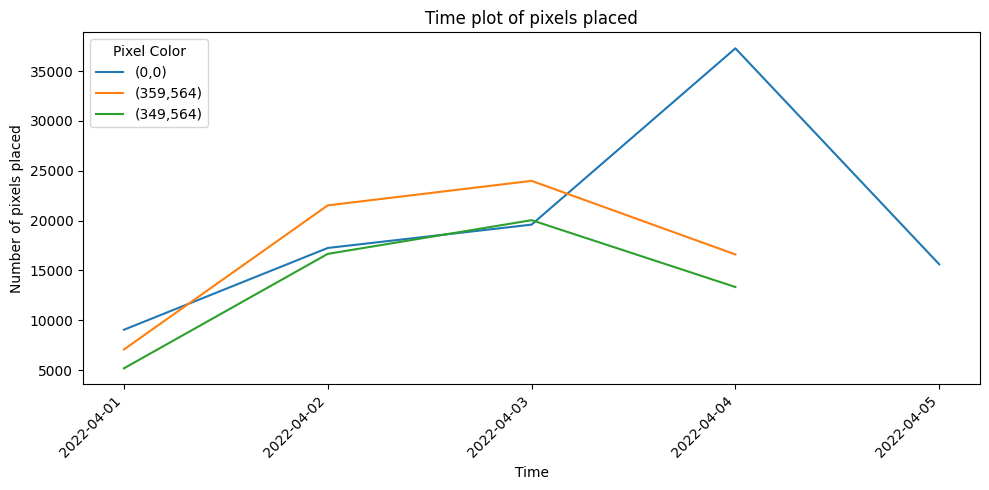

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(top_date, top_num_pixels, label="(0,0)")
plt.plot(second_date, second_num_pixels, label="(359,564)")
plt.plot(third_date, third_num_pixels, label="(349,564)")
plt.xlabel('Time')
plt.ylabel('Number of pixels placed')
plt.title('Time plot of pixels placed')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.legend(title="Pixel Color", loc="upper left")
plt.show()


The plot above depicts the number of pixels placed each day of the competition over the three most popular pixel locations. The blue line shows the number of pixels placed at (0, 0) each day, which peaks on April 4, 2022. The orange and green lines show the number of pixels placed at (359,564) and (349,564), respectively. These two lines exhibit a similar pattern in the number of pixels placed each day, which makes sense because these are the locations of the skull's eyes. (359,564) is the skull's left eye, which has more pixel placements than the right eye on each day. This may be because users were trying to repeatedly place blue pixels on the left eye to resemble Sans, as documented by the r/place Atlas website.